# <center>Практика EDA. Статистические тесты. Исследования для HR-агентства

## Постановка задачи  
HR-агентство изучает тренды на рынке труда в IT. Необходимо провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы.  
Вопросы:  
1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. Ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
 
 Использовать разные тесты для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
    - для одной выборки;
    - для двух выборок;
    - для нескольких выборок;
- тест для категориальных признаков.

Данные содержат следующие столбцы:  
- work_year	- Год, в котором была выплачена зарплата  
- experience_level	- Опыт работы на этой должности в течение года со следующими возможными значениями:  
    - EN — Entry-level/Junior;  
    - MI — Mid-level/Intermediate;   
    - SE — Senior-level/Expert;  
    - EX — Executive-level/Director.  
- employment_type - Тип трудоустройства для этой роли:
    - PT — неполный рабочий день;  
    - FT — полный рабочий день;  
    - CT — контракт;  
    - FL — фриланс.  
- job_title	- Роль, в которой соискатель работал в течение года.  
- salary - Общая выплаченная валовая сумма заработной платы.  
- salary_currency -	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.  
- salary_in_usd	- Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).  
- employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.  
- remote_ratio - Общий объём работы, выполняемой удалённо. Возможные значения:
    - 0 — удалённой работы нет (менее 20 %);  
    - 50 — частично удалённая работа;  
    - 100 — полностью удалённая работа (более 80 %).  
- company_location - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.  
- company_size - Среднее количество людей, работавших в компании в течение года:  
    - S — менее 50 сотрудников (небольшая компания);  
    - M — от 50 до 250 сотрудников (средняя компания);  
    - L — более 250 сотрудников (крупная компания).  

Источник датасета: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [6]:
# загружаем необходимые библиотеки
import pandas
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn import preprocessing

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [7]:
# Что избежать отображение предупреждений об использовании sqlalchemy 
import warnings
warnings.filterwarnings("ignore")

Данные скопированы в Google Drive, доступны по [ссылке](https://drive.google.com/file/d/13VPqlqxaLBN_m1JvtK070aLMlWd9FcO0).

Для скачивания данных используем команду `!wget`.

Данные появятся в локальной директории.

In [9]:
# пробовала скачать через wget, но не получилось, в Пачке не смогли помочь, поэтому скачиваю файл привычным способом

# в ссылке указан id файла на Google Drive
# !wget "https://drive.google.com/file/d/13VPqlqxaLBN_m1JvtK070aLMlWd9FcO0" -O salaries.csv

In [10]:
#import requests
#url = 'https://drive.google.com/file/d/13VPqlqxaLBN_m1JvtK070aLMlWd9FcO0'


#response = requests.get(url)
#file_Path = 'ds_salaries.csv'

#if response.status_code == 200:
    #with open(file_Path, 'wb') as file:
        #file.write(response.content)
    #print('File downloaded successfully')
#else:
    #print('Failed to download file')

#data = pd.read_csv('./ds_salaries.csv')
#data.head()

In [11]:
# загружаем датасет
data = pd.read_csv('data./ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [12]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений). 
Столбцы work_year salary salary_in_usd remote_ratio числовые, остальные категориальные
Проверим данные на наличие полных дубликатов:

In [16]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

Количество дубликатов: 0


In [17]:
# Создадим новый признак salary_round, округлив зп до целого числа
# для удобства сразу преобразуем признак в int
data['salary_round'] = data['salary_in_usd'].round().astype(int)

Столбец salary коррелируется со столбцом salary_in_usd и новым созданным salary_round, удалим столбцы salary и salary_in_usd, а также столбец Unnamed: 0 с порядковым номером 

In [19]:
data = data.drop(['salary_in_usd', 'salary', 'Unnamed: 0'], axis=1)
data.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_round
0,2020,MI,FT,Data Scientist,EUR,DE,0,DE,L,79833
1,2020,SE,FT,Machine Learning Scientist,USD,JP,0,JP,S,260000
2,2020,SE,FT,Big Data Engineer,GBP,GB,50,GB,M,109024
3,2020,MI,FT,Product Data Analyst,USD,HN,0,HN,S,20000
4,2020,SE,FT,Machine Learning Engineer,USD,US,50,US,L,150000


### Распределение заработной платы по всем соискателям

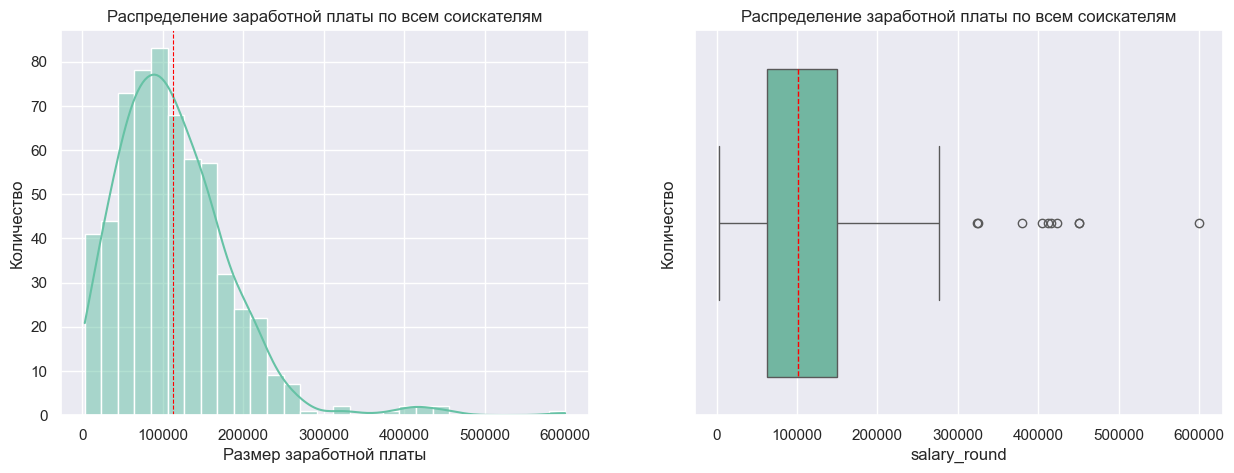

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_round'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы', ylabel='Количество')
axes[0].set_title('Распределение заработной платы по всем соискателям')
axes[0].axvline(data['salary_round'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_round'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Количество')
axes[1].set_title('Распределение заработной платы по всем соискателям')

plt.show()

Распределение отлично от нормального  
В выборке имеются выбросы

In [23]:
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_round
count,607.000000,607,607,607,607,607,607.00000,607,607,607.000000
unique,NaN,4,4,50,17,57,NaN,50,3,NaN
top,NaN,SE,FT,Data Scientist,USD,US,NaN,US,M,NaN
freq,NaN,280,588,143,398,332,NaN,355,326,NaN
mean,2021.405272,NaN,NaN,NaN,NaN,NaN,70.92257,NaN,NaN,112297.869852
std,0.692133,NaN,NaN,NaN,NaN,NaN,40.70913,NaN,NaN,70957.259411
min,2020.000000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,2859.000000
25%,2021.000000,NaN,NaN,NaN,NaN,NaN,50.00000,NaN,NaN,62726.000000
50%,2022.000000,NaN,NaN,NaN,NaN,NaN,100.00000,NaN,NaN,101570.000000
75%,2022.000000,NaN,NaN,NaN,NaN,NaN,100.00000,NaN,NaN,150000.000000


Закодирую порядковым кодированием столбец experience_level:  
experience_level - Опыт работы на этой должности в течение года со следующими возможными значениями:  
EN — Entry-level/Junior;  
MI — Mid-level/Intermediate   

SE — Senior-level/Expe;   
;
EX — Executive-level/Direc  tortor.

In [25]:
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'experience_level',
	'mapping': {'EN': 1, 'MI': 2, 'SE': 3, 
                'EX': 4}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(data[['experience_level']])
data_bin = data_bin.rename(columns={'experience_level':'level_of_experience'})
# добавляем результат к исходному DataFrame
data = pd.concat([data, data_bin], axis=1)

Закодирую порядковым кодированием столбец company_size:  
S — менее 50 сотрудников (небольшая компания);  
M — от 50 до 250 сотрудников (средняя компания)  
L — более 250 сотрудников (крупная компания).

In [27]:
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'company_size',
	'mapping': {'S': 1, 'M': 2, 'L': 3}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(data[['company_size']])
data_bin = data_bin.rename(columns={'company_size':'size_of_company'})
# добавляем результат к исходному DataFrame
data = pd.concat([data, data_bin], axis=1)
data.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_round,level_of_experience,size_of_company
0,2020,MI,FT,Data Scientist,EUR,DE,0,DE,L,79833,2,3
1,2020,SE,FT,Machine Learning Scientist,USD,JP,0,JP,S,260000,3,1
2,2020,SE,FT,Big Data Engineer,GBP,GB,50,GB,M,109024,3,2
3,2020,MI,FT,Product Data Analyst,USD,HN,0,HN,S,20000,2,1
4,2020,SE,FT,Machine Learning Engineer,USD,US,50,US,L,150000,3,3


In [28]:
## data[data['employment_type'] == 'CT'].head() ## проверяю у каких специалтьностей есть тип трудостройтва CT — контракт


In [29]:
# Построю матрицу корреляций для датасета
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

                     work_year  remote_ratio  salary_round  \
work_year             1.000000      0.076314      0.170493   
remote_ratio          0.076314      1.000000      0.132122   
salary_round          0.170493      0.132122      1.000000   
level_of_experience   0.294759      0.097784      0.484233   
size_of_company      -0.078764     -0.022070      0.151205   

                     level_of_experience  size_of_company  
work_year                       0.294759        -0.078764  
remote_ratio                    0.097784        -0.022070  
salary_round                    0.484233         0.151205  
level_of_experience             1.000000         0.063511  
size_of_company                 0.063511         1.000000  


<Axes: >

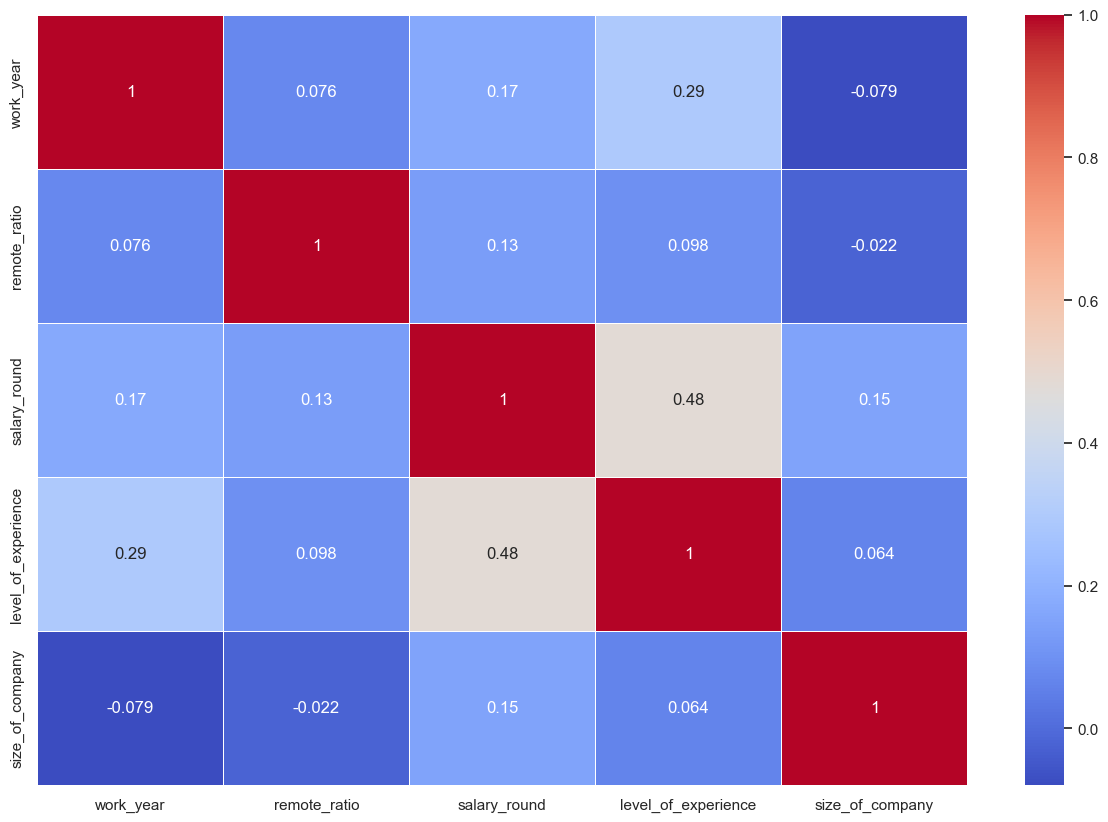

In [30]:
# построю тепловую карту матрицы коррелияций
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(numeric_only = True), annot=True, linewidths=.5, ax=ax, cmap='coolwarm')

### Предварительные выводы по тепловой карте
Мультиколлениарность практически отсутствует. 

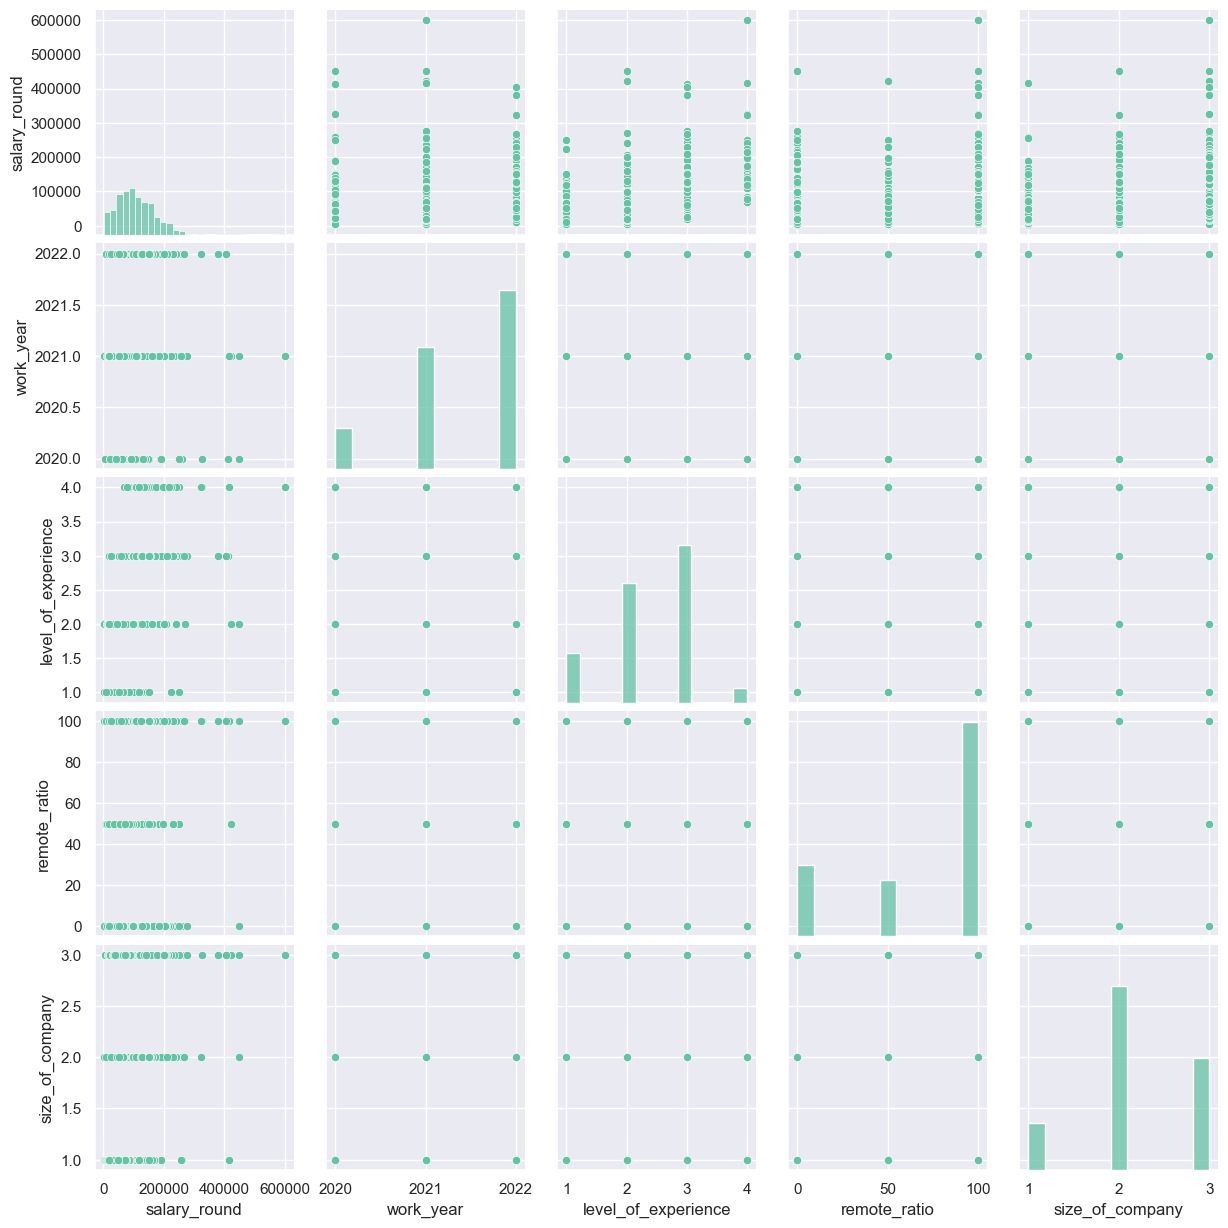

In [32]:
# Построим график попарных отношений
sns.pairplot(data[['salary_round', 'work_year', 'level_of_experience', 'remote_ratio','size_of_company']])

С увеличением уровня опыта работы появляются выбросы вправо и начальная точка ЗП сдвигается в большую сторону.  
% удаленной работы не сильно влият на уровень ЗП.  
В зависимости от размера компании вправо сдвигается уровень ЗП, могу предположить, что в крупных компаниях больше руководящих должностей.

In [161]:
# установим фильтр на Data Scientist
data_s = data[data['job_title'] == 'Data Scientist']

Посмотрю как распределяется ЗП для Data Scientist в зависимости от основной страны проживания и страну головного офиса работодателя.

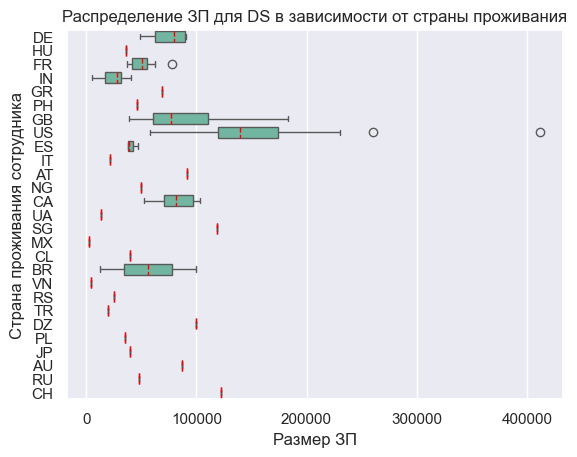

In [166]:
ax = sns.boxplot(data_s, x='salary_round', y='employee_residence', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Страна проживания сотрудника')
plt.title('Распределение ЗП для DS в зависимости от страны проживания')
plt.show()

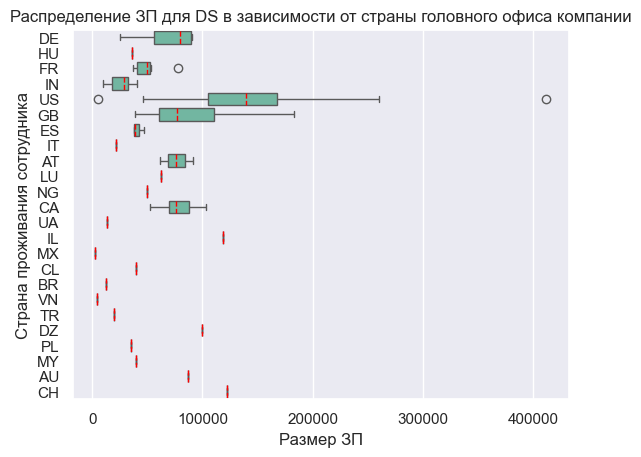

In [168]:
ax = sns.boxplot(data_s, x='salary_round', y='company_location', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Страна проживания сотрудника')
plt.title('Распределение ЗП для DS в зависимости от страны головного офиса компании')
plt.show()

Уровень ЗП DS зависит от страны проживания   
Уровень ЗП DS зависит от страны головного офиса компании  

## Проверим есть ли связь между годами и ЗП Data Scientist.  
Построим коробчатую диаграмму, которая показывает распределение заработной платы по годам, затем проведем тест.   

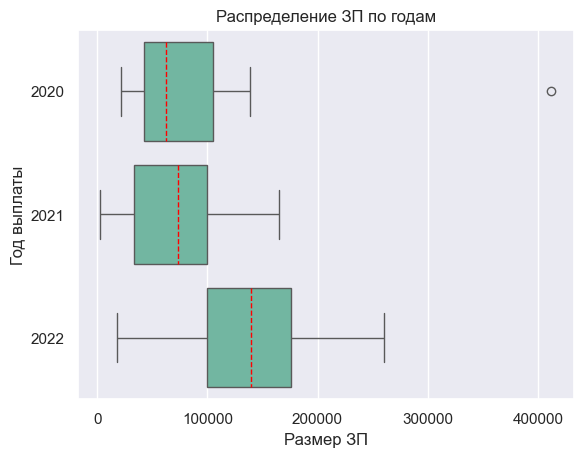

In [163]:
ax = sns.boxplot(data_s, x='salary_round', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Год выплаты')
plt.title('Распределение ЗП по годам')
plt.show()

## Сформулируем нулевую и альтернативные гипотезы  

*Нулевая гипотеза*:  размер ЗП не отличается по годам: 2020 (μ_1), 2021 (μ_2), 2022 (μ_3).  

$$ H_0 : μ_1 = μ_2 = μ_3 $$  


*Альтернативная гипотеза*:  размер ЗП отличается по годам: 2020 (μ_1), 2021 (μ_2), 2022 (μ_3).  

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$  

## С помощью теста Шапиро-Уилка проверим данные на нормальность

In [40]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

In [41]:
salary_2020 = data_s.loc[data_s['work_year']==2020, 'salary_round']
salary_2021 = data_s.loc[data_s['work_year']==2021, 'salary_round']
salary_2022 = data_s.loc[data_s['work_year']==2022, 'salary_round']

# проводим тест Шапиро-Уилка
print('Для 2020:')
result = stats.shapiro(salary_2020)
decision_normality(result[1])

print('Для 2021:')
result = stats.shapiro(salary_2021)
decision_normality(result[1])

print('Для 2022:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])

Для 2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021:
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для 2022:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


## Выберем подходящий тест  
Данные количественные  
Групп 3  
Группы не зависимые  
Признак не распределен по нормальному закону  
### Выбираем критерий Краскела-Уоллиса 


In [43]:
# проводим тест
_, p = stats.kruskal(salary_2020, salary_2021, salary_2022)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод**  
Существует статистически значимая взаимосвязь между годом и ЗП Data Scientist.   
На графике видно, что медианное значение растет от года к году. 

## Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году  
Построим коробчатую диаграмму медианных ЗП DS и DE

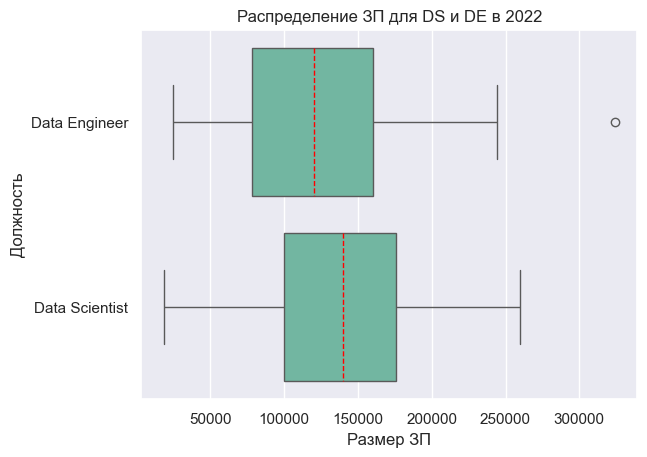

In [46]:
# установим фильтр на Data Scientist и Data Engineer и 2022 году 
data_d = data[(data['work_year'] == 2022) & ((data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer'))]
ax = sns.boxplot(data_d, x='salary_round', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Должность')
plt.title('Распределение ЗП для DS и DE в 2022')
plt.show()

## Сформулируем нулевую и альтернативные гипотезы  

Нулевая гипотеза: размер ЗП DS в 2022 больше либо равен ЗП DE: DS (μ_1), DS (μ_2).  

$$ H_0 : μ_1 >= μ_2 $$   

Альтернативная гипотеза: размер ЗП DS в 2022 меньше ЗП DE: DS (μ_1), DS (μ_2).  

$$ H_1 : μ_1 < μ_2 $$    



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [49]:
# значения ЗП для DS и DE
salary_ds = data_d.loc[data_d['job_title']=='Data Scientist', 'salary_round']
salary_de = data_d.loc[data_d['job_title']=='Data Engineer', 'salary_round']

# проводим тест Шапиро-Уилка
print('Для Data Scientis:')
result = stats.shapiro(salary_ds)
decision_normality(result[1])

print('Для Data Engineer:')
result = stats.shapiro(salary_de)
decision_normality(result[1])

Для Data Scientis:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Data Engineer:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признакsalary_roundлат»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать U-критерий Манна — Уитни.

**Проведём тест**

In [51]:
_, p = stats.mannwhitneyu(salary_ds, salary_de, alternative='less')
decision_hypothesis(p)

p-value = 0.923
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Размер заработных плат Data Scientist больше или равен Data Engineer.
Возвращаясь к построенной диаграмме делаем вывод, что ЗП DS больше ЗП DE.

## Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров  
Построим коробчатую диаграмму медианных ЗП DS для компаний различных размеров

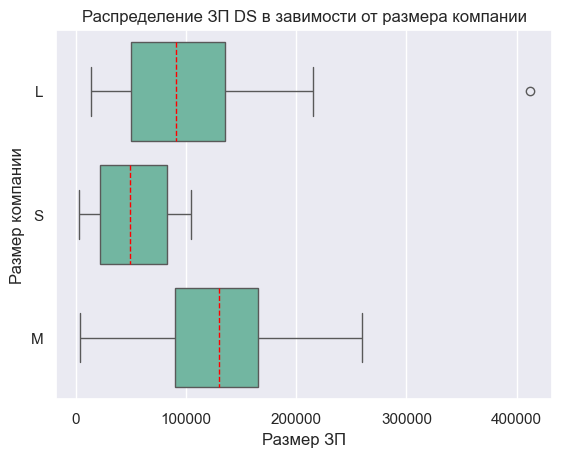

In [54]:
# установим фильтр на Data Scientist data_s = data[data['job_title'] == 'Data Scientist']
ax = sns.boxplot(data_s, x='salary_round', y='company_size',  orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Размер компании')
plt.title('Распределение ЗП DS в завимости от размера компании')
plt.show()

## Сформулируем нулевую и альтернативные гипотезы  

*Нулевая гипотеза*:  размер ЗП не отличается в зависимости от размера компаний: L (μ_1), S (μ_2), M (μ_3).  

$$ H_0 : μ_1 = μ_2 = μ_3 $$  


*Альтернативная гипотеза*:  размер ЗП отличается в зависимости от размера компаний: L (μ_1), S (μ_2), M (μ_3).  

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$  

## С помощью теста Шапиро-Уилка проверим данные на нормальность

In [56]:
size_l = data_s.loc[data_s['company_size']=='L', 'salary_round']
size_s = data_s.loc[data_s['company_size']=='S', 'salary_round']
size_m = data_s.loc[data_s['company_size']=='M', 'salary_round']

# проводим тест Шапиро-Уилка
print('Для L:')
result = stats.shapiro(size_l)
decision_normality(result[1])

print('Для S:')
result = stats.shapiro(size_s)
decision_normality(result[1])

print('Для L:')
result = stats.shapiro(size_m)
decision_normality(result[1])

Для L:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для S:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для L:
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


## Выберем подходящий тест  
Данные количественные  
Групп 3  
Группы не зависимые  
Признак не распределен по нормальному закону  
### Выбираем критерий Краскела-Уоллиса 

In [58]:
# проводим тест
_, p = stats.kruskal(size_l, size_s, size_m)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод**  
Существует статистически значимая взаимосвязь между размером компании и ЗП Data Scientist.    

## Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
Построим многоуровневую столбчатую диаграмму

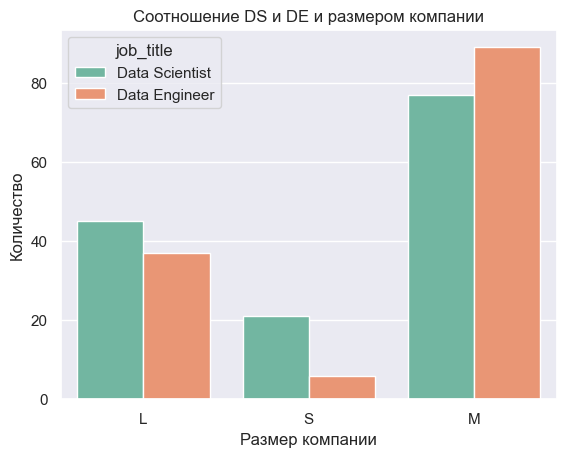

In [61]:
# отфильтруем специальности DS и DE
data_d = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]
ax = sns.countplot(data_d, x=data['company_size'], hue='job_title')
ax.set(xlabel='Размер компании', ylabel='Количество')
plt.title('Соотношение DS и DE и размером компании')
plt.show()

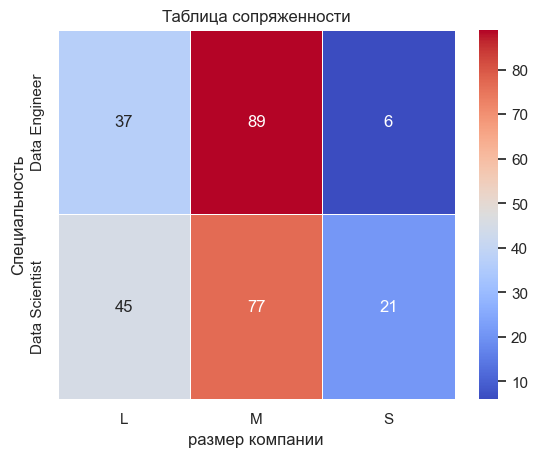

In [62]:
cross_tab = pd.crosstab(data_d['job_title'], columns=data_d['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='размер компании', ylabel='Специальность')
plt.title('Таблица сопряженности')
plt.show()

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: Между наличием должностей Data Scientist и Data Engineer и размером компании связи нет (признаки независимы).

*Альтернативная гипотеза*: Между наличием должностей Data Scientist и Data Engineer и размером компании связь есть (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «job_title»? — Категориальный.
* Сколько сравниваемых групп? — Три.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [65]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(data_d['job_title'], columns=data_d['company_size'])

cross_table

company_size,L,M,S
job_title,,,
Data Engineer,37,89,6
Data Scientist,45,77,21


In [66]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**  
Существует статистически значимая связь между размером компании и наличием должностей Data Scientist и Data Engineer.   

## Проверим как связаны размер компании и опыт работы для Data Scientist
Построим многоуровневую столбчатую диаграмму

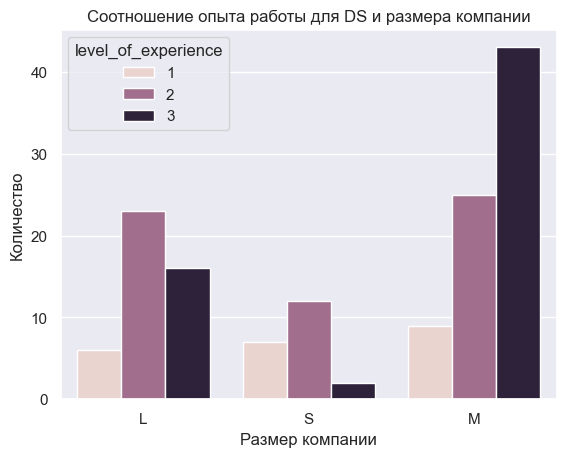

In [69]:
ax = sns.countplot(data_s, x=data_s['company_size'], hue='level_of_experience')
ax.set(xlabel='Размер компании', ylabel='Количество')
plt.title('Соотношение опыта работы для DS и размера компании')
plt.show()

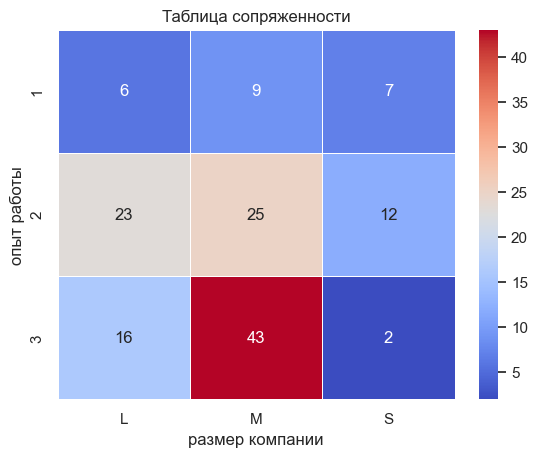

In [70]:
cross_tab = pd.crosstab(data_s['level_of_experience'], columns=data_s['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='размер компании', ylabel='опыт работы')
plt.title('Таблица сопряженности')
plt.show()

Сформулируем нулевую и альтернативные гипотезы

Нулевая гипотеза: Между опытом работы для должности Data Scientist  и размером компании связи нет (признаки независимы).

Альтернативная гипотеза: Между опытом работы для должности Data Scientist  и размером компании связь есть (признаки зависимы).

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «job_title»? — Категориальный.
* Сколько сравниваемых групп? — Три.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [73]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(data_s['level_of_experience'], columns=data_s['company_size'])

cross_table

company_size,L,M,S
level_of_experience,,,
1,6,9,7
2,23,25,12
3,16,43,2


In [74]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**  
Есть связь между опытом работы и размером компании для Data Scientist.   

## Проверим как связаны размер ЗП Data Scientist для страны-моды US и страны проживания сотрудника
Построим коробчатую диаграмму

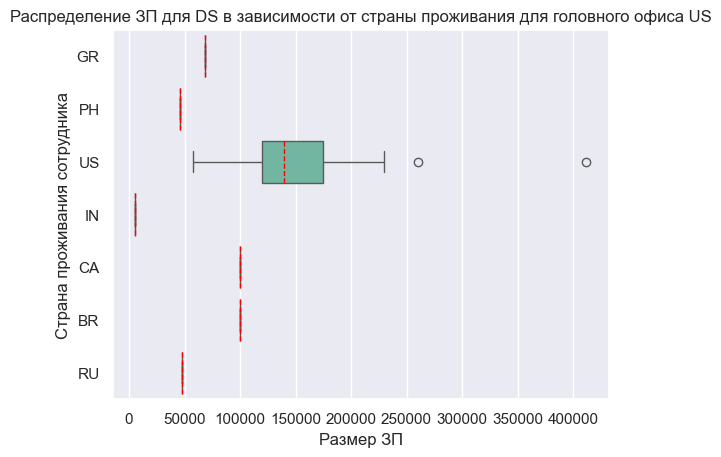

In [80]:
# установим фильтр на Data Scientist и стране головного офиса работодателя US
data_us = data_s[data_s['company_location'] == 'US']
ax = sns.boxplot(data_us, x='salary_round', y='employee_residence', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Страна проживания сотрудника')
plt.title('Распределение ЗП для DS в зависимости от страны проживания для головного офиса US')
plt.show()

У нас сотрудники проживали в 6 странах, закодируем их как прочие.  
Создадим новый признак 

In [82]:
data_us['residence_index'] = data_us['employee_residence'].apply(lambda x: 1 if x == 'US' else 0)
print(data_us['residence_index'])

32     0
40     0
48     1
57     1
58     1
      ..
592    1
593    1
596    1
598    1
599    1
Name: residence_index, Length: 84, dtype: int64


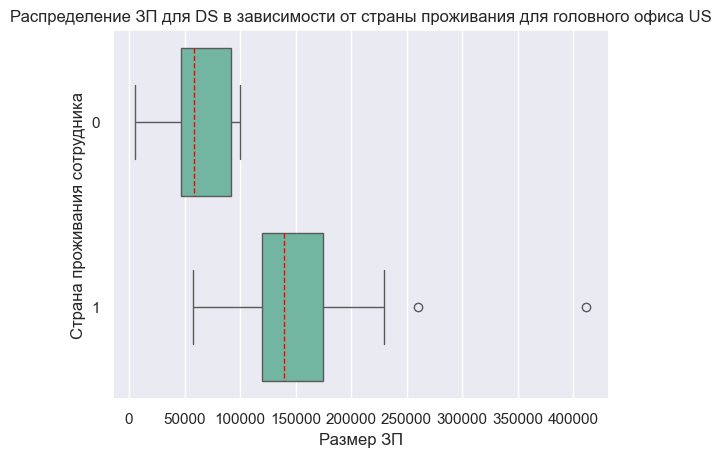

In [83]:
ax = sns.boxplot(data_us, x='salary_round', y='residence_index', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Страна проживания сотрудника')
plt.title('Распределение ЗП для DS в зависимости от страны проживания для головного офиса US')
plt.show()

## Сформулируем нулевую и альтернативные гипотезы  

Нулевая гипотеза: размер ЗП DS для US и локации в US больше либо равен ЗП для локации сотрудника в другой стране: 1 (μ_1), 0 (μ_2)  
$$ H_0 : μ_1 >= μ_2 $$   

Альтернативная гипотеза: размер ЗП DS для US и локации в US меньше ЗП для локации сотрудника в другой стране: 1 (μ_1), 0 (μ_2).  

$$ H_1 : μ_1 < μ_2 $$    


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [86]:
# значения ЗП для DS и DE
salary_1 = data_us.loc[data_us['residence_index']==1, 'salary_round']
salary_0 = data_us.loc[data_us['residence_index']==0, 'salary_round']

# проводим тест Шапиро-Уилка
print('Для US:')
result = stats.shapiro(salary_1)
decision_normality(result[1])

print('Для прочих локаций:')
result = stats.shapiro(salary_0)
decision_normality(result[1])

Для US:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для прочих локаций:
p-value = 0.505
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

Какой тип у признак salary_roundлат»? — Количественный.  
Сколько сравниваемых групп? — Две.  
Группы зависимы? — Нет.  
Признак распределён по нормальному закону? — Да (делаю допущение, чтобы провести тест с нормальным распределением).  
Для проверки нашей гипотезы можно использовать Двухвыборочный t-критерий.

Проведём тест
Для начала подсчитаем размер выборок

In [88]:
print(f'Количество для US: {salary_1.count()}')
print(f'Количество для прочих стран: {salary_0.count()}')

Количество для US: 78
Количество для прочих стран: 6


Очень большой разброс, медианой придётся заполнять более 30%.
Беру 6 случайных данных

In [90]:
salary_1_random = salary_1.sample(n=6, random_state=1)
print(salary_1_random)

571    140000
599    130000
424     80000
315    165220
553    144000
592    230000
Name: salary_round, dtype: int32


In [91]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_1_random, salary_0)
p = result[1]
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

Тест на равенство дисперсий
p-value = 0.842
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.


In [92]:
# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(salary_1_random, salary_0, alternative='less', equal_var=True)

print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Тест на равенство средних
p-value = 0.997
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**  
Для страны головного фоиса работодателя US ЗП для сотрудников  с локацией в US выше, чем в прочих странах. 

## Итоговые результаты исследования
На зарплату специалиста Data Scientist влияют страна проживания, страна головного офиса компании, опыт работы.
*   Существует статистически значимая взаимосвязь между годом и ЗП Data Scientist. ЗП растёт от года к году.
*   Размер заработных плат Data Scientist больше чем у Data Engineer. 
*   Существует статистически значимая взаимосвязь между размером компании и ЗП Data Scientist. Самые большие ЗП в компаниях размером М, самые маленькие в S.
*  Существует статистически значимая связь между размером компании и наличием должностей Data Scientist и Data Engineer. Самое большое количество должностей в компаниях размером М, самое меншее в S.

## Дополнительные исследования  
* Есть связь между опытом работы и разером компании.
* Для страны головного фоиса US есть связь между страной головного фоиса и локацией сотрудника. 